# Ex01 Line chart styles

In [14]:
import pandas as pd
import sqlite3

In [15]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [16]:
commit_data =  pd.read_sql("""
                SELECT timestamp as commit_time FROM checker
                WHERE uid LIKE 'user%' or uid is null
            """, 
            con, parse_dates='commit_time')
commit_data

,commit_time
0,2020-04-17 05:18:51.965864
1,2020-04-17 05:19:02.744528
2,2020-04-17 05:22:35.249331
3,2020-04-17 05:22:45.549397
4,2020-04-17 05:34:14.691200
...,...
3387,2020-05-21 20:19:06.872761
3388,2020-05-21 20:22:41.785725
3389,2020-05-21 20:22:41.877806
3390,2020-05-21 20:37:00.129678


In [17]:
view_data = pd.read_sql("""
                SELECT datetime FROM pageviews
                WHERE uid LIKE 'user%' or uid is null
            """, 
            con, parse_dates='datetime')
view_data

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [18]:
commit_data['commit_date'] = commit_data.commit_time.dt.date
commit_data

,commit_time,commit_date
0,2020-04-17 05:18:51.965864,2020-04-17
1,2020-04-17 05:19:02.744528,2020-04-17
2,2020-04-17 05:22:35.249331,2020-04-17
3,2020-04-17 05:22:45.549397,2020-04-17
4,2020-04-17 05:34:14.691200,2020-04-17
...,...,...
3387,2020-05-21 20:19:06.872761,2020-05-21
3388,2020-05-21 20:22:41.785725,2020-05-21
3389,2020-05-21 20:22:41.877806,2020-05-21
3390,2020-05-21 20:37:00.129678,2020-05-21


In [19]:
view_data['view_date'] = view_data.datetime.dt.date
view_data

,datetime,view_date
0,2020-04-17 22:46:26.785035,2020-04-17
1,2020-04-18 10:53:52.623447,2020-04-18
2,2020-04-18 10:56:55.833899,2020-04-18
3,2020-04-18 10:57:37.331258,2020-04-18
4,2020-04-18 12:05:48.200144,2020-04-18
...,...,...
982,2020-05-21 18:45:20.441142,2020-05-21
983,2020-05-21 23:03:06.457819,2020-05-21
984,2020-05-21 23:23:49.995349,2020-05-21
985,2020-05-22 11:30:18.368990,2020-05-22


In [20]:
views_dates_counts = view_data.groupby(view_data.view_date, as_index = False).view_date.value_counts()
views_dates_counts

,view_date,count
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [21]:
commits_dates_counts = commit_data.groupby(commit_data.commit_date, as_index = False).commit_date.value_counts()
commits_dates_counts

,commit_date,count
0,2020-04-17,26
1,2020-04-18,78
2,2020-04-19,36
3,2020-04-20,32
4,2020-04-21,26
5,2020-04-22,32
6,2020-04-23,48
7,2020-04-24,16
8,2020-04-25,114
9,2020-04-26,278


In [22]:
df_counts = pd.merge(left=commits_dates_counts, right=views_dates_counts, left_on="commit_date",right_on="view_date")
df_counts.rename(columns = {'count_x' : 'commit_count', 'count_y':'view_count', 'commit_date':'date'}, inplace = True)
df_counts.drop(columns='view_date', inplace = True)
df_counts.date = pd.to_datetime(df_counts.date)
df_counts


,date,commit_count,view_count
0,2020-04-17,26,1
1,2020-04-18,78,23
2,2020-04-19,36,15
3,2020-04-21,26,3
4,2020-04-22,32,1
5,2020-04-23,48,5
6,2020-04-25,114,1
7,2020-04-26,278,8
8,2020-04-28,6,2
9,2020-04-29,18,4


In [23]:
df_counts.count()

date            32
commit_count    32
view_count      32
dtype: int64

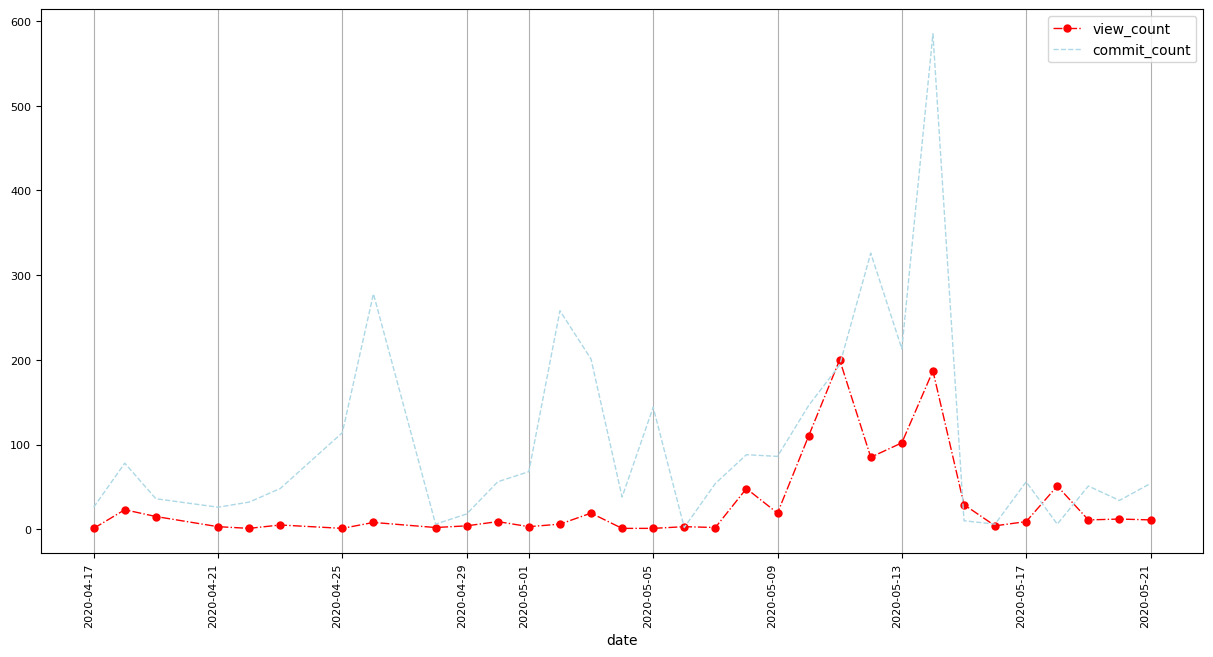

In [24]:
ax = df_counts.plot(x='date', y ='view_count',
                    color='red',
                    linestyle='-.'
                    ,marker='o',
                    fontsize=8,
                    lw=1,
                    markersize=5,
                    figsize=(15,8),
                    rot=90
                    )
ax = df_counts.plot(x='date', y='commit_count',ax=ax,linestyle='--',lw=1,color='lightblue',rot=90)
ax.grid('on',axis='x')

Сколько раз количество просмотров превышало 150? Ответ: 2

In [25]:
(df_counts.view_count > 150).sum()

2

In [26]:
cur.close()